# Loading and Inspecting Data

In [ ]:
import sklearn
from sklearn import datasets
import pandas as pd

print(sklearn.__version__)

diab = datasets.load_diabetes(as_frame=True)

print(type(diab))

for key in diab.keys():
  print(key)

print(diab['DESCR'][0:2000] + "\n...")

print("\nStructure of data:\n", type(diab.data))

print("\nSize of dimensions of array: \n(m x n) =", diab.data.shape)

print("\nFeature names:\n", diab.feature_names, "\n")

#print("\nData itself:\n", diab.data)

diabnp = diab.data.to_numpy()

print("\nThe data types of each feature column are:")

for i in range(len(diabnp[0])):
  print(type(diabnp[0][i]))

print("\nFirst five rows of data: \n", diab.data[:5])

print("\nStructure of data:\n", type(diab.target))

print("\nSize of dimensions of array: \n(m x n) =", diab.target.shape)

print("\nType of data in target:\n", type(diab.target.dtype))

print("\nFirst five rows of data: \n", diab.target[:5])

print("Min:", min(diab.target))

print("Max:", max(diab.target))

1.6.1
<class 'sklearn.utils._bunch.Bunch'>
data
target
frame
DESCR
feature_names
data_filename
target_filename
data_module
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possib

# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diab.data, diab.target, random_state=0)

print("X_train shape:", X_train.shape)
print("y train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train.describe()

X_train shape: (331, 10)
y train shape: (331,)
X_test shape: (111, 10)
y_test shape: (111,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,-0.000005,0.001147,-0.001283,-0.000948,-0.000742,-0.001098,-0.000172,0.000579,-0.000101,0.000111
std,0.048192,0.047696,0.048700,0.047401,0.047406,0.047435,0.047890,0.048596,0.049075,0.049977
min,-0.107226,-0.044642,-0.090275,-0.112399,-0.108893,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767
25%,-0.038207,-0.044642,-0.036385,-0.036656,-0.034592,-0.030906,-0.034197,-0.039493,-0.033246,-0.034215
50%,0.005383,-0.044642,-0.008362,-0.005670,-0.004321,-0.004759,-0.006584,-0.002592,-0.004222,-0.001078
75%,0.038076,0.050680,0.030440,0.032201,0.025262,0.024521,0.026550,0.034309,0.030878,0.029988
max,0.110727,0.050680,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133597,0.135612


# Visually Inspecting Data

          age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.161531  0.199182  0.374377  0.278057  0.238364 -0.097893   
sex  0.161531  1.000000  0.081986  0.256404  0.042435  0.144339 -0.357532   
bmi  0.199182  0.081986  1.000000  0.432713  0.255968  0.267426 -0.382282   
bp   0.374377  0.256404  0.432713  1.000000  0.259533  0.195864 -0.215710   
s1   0.278057  0.042435  0.255968  0.259533  1.000000  0.889024  0.012766   
s2   0.238364  0.144339  0.267426  0.195864  0.889024  1.000000 -0.232576   
s3  -0.097893 -0.357532 -0.382282 -0.215710  0.012766 -0.232576  1.000000   
s4   0.229502  0.314384  0.414690  0.288742  0.554083  0.663937 -0.755164   
s5   0.284923  0.140039  0.454033  0.421525  0.532322  0.318399 -0.406113   
s6   0.319720  0.235086  0.392243  0.411377  0.338349  0.295124 -0.305594   

           s4        s5        s6  
age  0.229502  0.284923  0.319720  
sex  0.314384  0.140039  0.235086  
bmi  0.414690  0.454033  0.392243  
bp   0.2

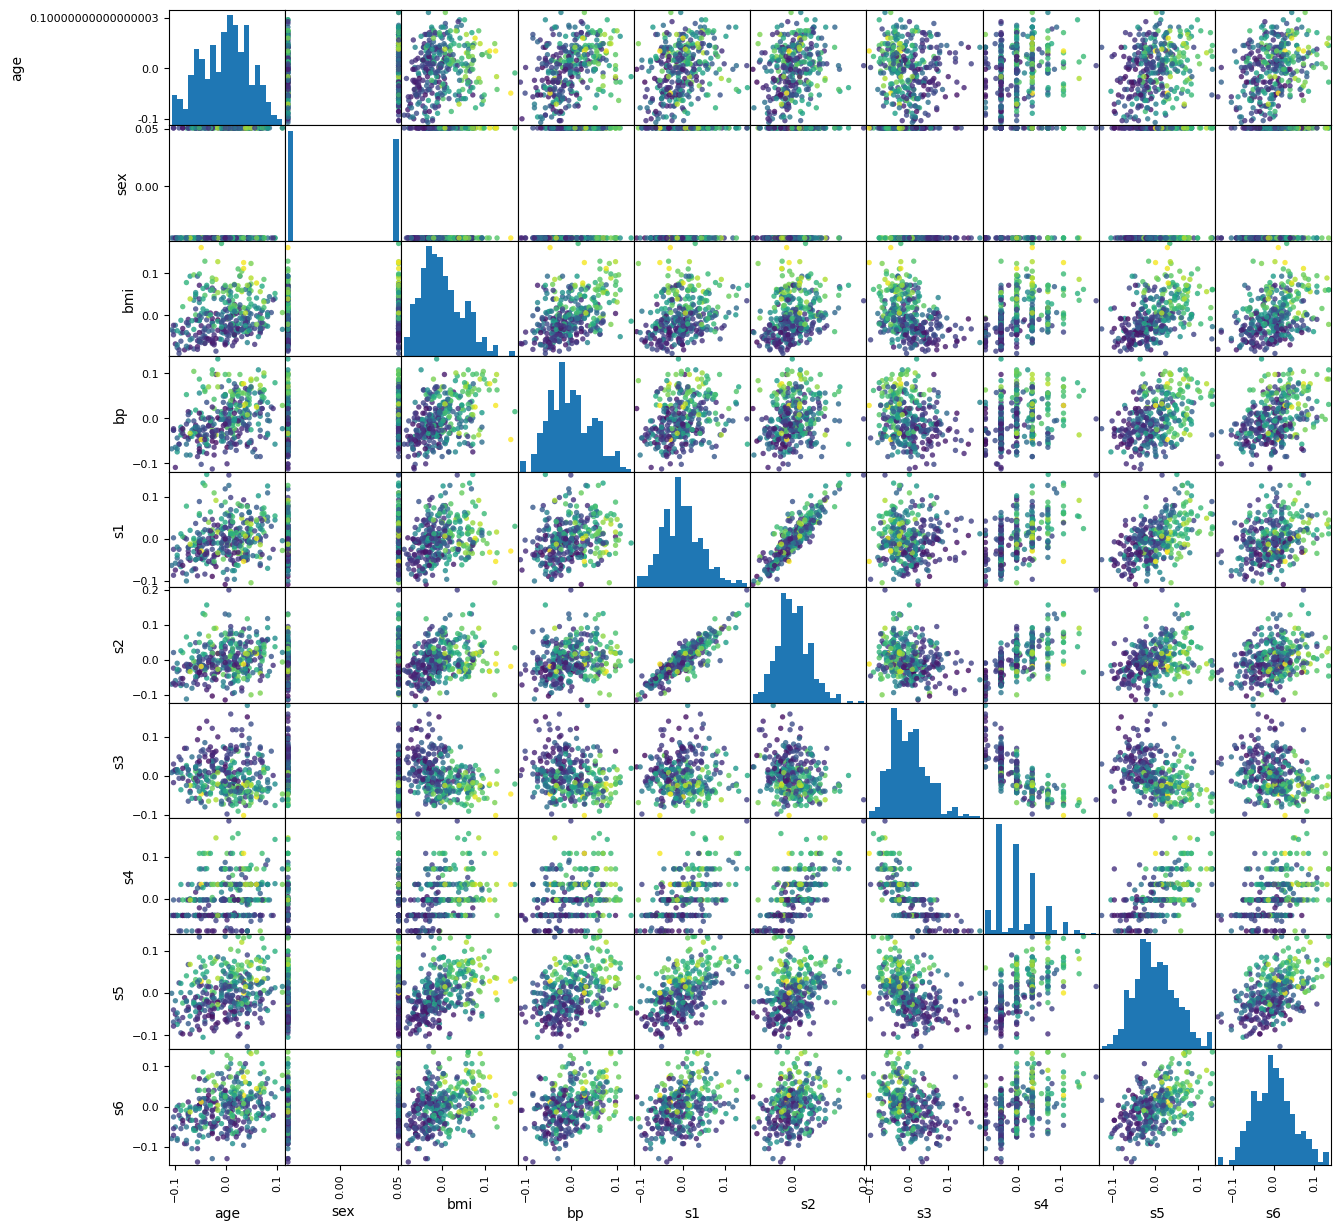

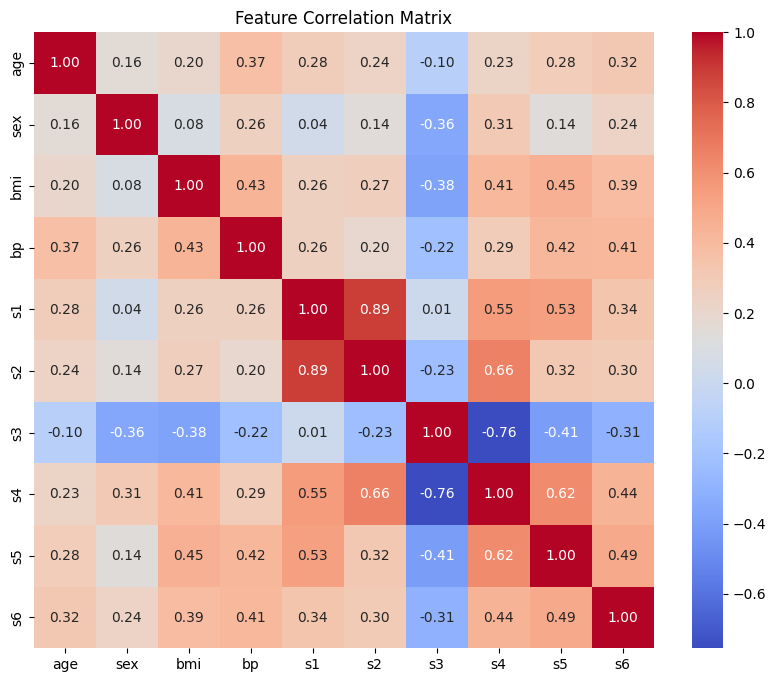

In [ ]:
diab_df = pd.DataFrame(X_train, columns= diab.feature_names)

#create a scatter matrix from the dataframe, color by y_train
axes = pd.plotting.scatter_matrix(diab_df, c=y_train, figsize=(15,15), hist_kwds={'bins': 20}, s=60,
                           alpha=0.8)

#actual correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your features DataFrame
corr_matrix = X_train.corr()

# Print numeric values
print(corr_matrix)
print()

# Optional heatmap for presentation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Linear Regression

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
d2 = datasets.load_diabetes(as_frame=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    d2.data, d2.target, random_state=0
)

# Add constant (intercept) to training data
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_const)
ols_results = ols_model.fit()

# Inference summary
print(ols_results.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     39.98
Date:                Tue, 13 May 2025   Prob (F-statistic):           1.32e-50
Time:                        16:46:02   Log-Likelihood:                -1782.1
No. Observations:                 331   AIC:                             3586.
Df Residuals:                     320   BIC:                             3628.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.0679      2.956     51.782      0.0

# Predicting and Metrics with Lin Reg

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict
y_pred_ols = ols_results.predict(X_test_const)

# Metrics
mse = mean_squared_error(y_test, y_pred_ols)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ols)
rss = ((y_test - y_pred_ols) ** 2).sum()
r2 = r2_score(y_test, y_pred_ols)

# Store in dictionary
metrics_ols = {
    "MSE": mse,
    "RMSE": rmse,
    "MAE": mae,
    "RSS": rss,
    "R²": r2
}

# Print
for key, value in metrics_ols.items():
    print(f"{key}: {value:.2f}")


MSE: 3180.16
RMSE: 56.39
MAE: 45.12
RSS: 352997.72
R²: 0.36


# Best Subset Selection - Search

In [ ]:
# Re-import required modules after kernel reset
from itertools import combinations
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Block 1: Search for Best Subset
def best_subset_search(X_train, y_train, X_test, y_test):
    features = X_train.columns
    results = []

    for k in range(1, len(features) + 1):
        for combo in combinations(features, k):
            model = LinearRegression()
            model.fit(X_train[list(combo)], y_train)
            y_pred = model.predict(X_test[list(combo)])
            mse = mean_squared_error(y_test, y_pred)
            results.append({
                "features": combo,
                "mse": mse
            })

    results_df = pd.DataFrame(results)
    best_row = results_df.loc[results_df["mse"].idxmin()]
    return best_row["features"], results_df.sort_values("mse")

# Execute best subset search
best_features, all_results = best_subset_search(X_train, y_train, X_test, y_test)


# Best Subset Selection - refit Lin Reg

In [ ]:
# Block 2: Refit Linear Regression on Best Subset
X_train_best = sm.add_constant(X_train[list(best_features)])
X_test_best = sm.add_constant(X_test[list(best_features)])

subset_model = sm.OLS(y_train, X_train_best).fit()
print(subset_model.summary())
y_pred_best = subset_model.predict(X_test_best)

# Compute metrics
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best)
rss = ((y_test - y_pred_best) ** 2).sum()
r2 = r2_score(y_test, y_pred_best)

# Store metrics
metrics_best = {
    "Best Subset Features": best_features,
    "MSE": mse,
    "RMSE": rmse,
    "MAE": mae,
    "RSS": rss,
    "R²": r2
}

# Print neatly
for key, value in metrics_best.items():
    print(key, ":", value)



                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     40.84
Date:                Tue, 13 May 2025   Prob (F-statistic):           5.42e-41
Time:                        16:46:08   Log-Likelihood:                -1811.4
No. Observations:                 331   AIC:                             3639.
Df Residuals:                     323   BIC:                             3669.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.7325      3.214     47.526      0.0

# Preparing Data for Ridge, Lasso, Elastic Net

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler

# Remove 'const' if it was added previously
X_train_noconst = X_train.drop(columns='const', errors='ignore')
X_test_noconst = X_test.drop(columns='const', errors='ignore')

# Scale only real features (no constant)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_noconst)
X_test_scaled = scaler.transform(X_test_noconst)

# Ridge

In [ ]:
from sklearn.linear_model import RidgeCV

# Fit Ridge model with cross-validation to choose best alpha
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train_scaled, y_train)


RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

# Predicting and Metrics with Ridge

In [ ]:
y_pred_ridge = ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ridge)
rss = ((y_test - y_pred_ridge) ** 2).sum()
r2 = r2_score(y_test, y_pred_ridge)

metrics_ridge = {
    "Alpha (λ)": ridge.alpha_,
    "MSE": round(mse, 2),
    "RMSE": round(rmse, 2),
    "MAE": round(mae, 2),
    "RSS": round(rss, 2),
    "R²": round(r2, 2)
}

for key, value in metrics_ridge.items():
    print(key, ":", value)



Alpha (λ) : 10.0
MSE : 3186.95
RMSE : 56.45
MAE : 45.15
RSS : 353751.6
R² : 0.36


# Lasso

In [ ]:
from sklearn.linear_model import LassoCV

# Fit Lasso with cross-validation
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_train_scaled, y_train)


LassoCV(cv=5, random_state=0)

# Predicting and Metrics with Lasso

In [ ]:
y_pred_lasso = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lasso)
rss = ((y_test - y_pred_lasso) ** 2).sum()
r2 = r2_score(y_test, y_pred_lasso)

metrics_lasso = {
    "Alpha (λ)": lasso.alpha_,
    "MSE": round(mse, 2),
    "RMSE": round(rmse, 2),
    "MAE": round(mae, 2),
    "RSS": round(rss, 2),
    "R²": round(r2, 2)
}

for key, value in metrics_lasso.items():
    print(key, ":", value)


Alpha (λ) : 1.861736699348861
MSE : 3198.39
RMSE : 56.55
MAE : 45.31
RSS : 355021.42
R² : 0.36


# Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNetCV

# Fit ElasticNet with cross-validation
elastic = ElasticNetCV(cv=5, random_state=0, l1_ratio=[0.1, 0.5, 0.9])
elastic.fit(X_train_scaled, y_train)


ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9], random_state=0)

# Predicting and Metrics with Elastic Net

In [ ]:
y_pred_elastic = elastic.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_elastic)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_elastic)
rss = ((y_test - y_pred_elastic) ** 2).sum()
r2 = r2_score(y_test, y_pred_elastic)

metrics_elastic = {
    "Alpha (λ)": elastic.alpha_,
    "L1 Ratio (α)": elastic.l1_ratio_,
    "MSE": round(mse, 2),
    "RMSE": round(rmse, 2),
    "MAE": round(mae, 2),
    "RSS": round(rss, 2),
    "R²": round(r2, 2)
}

for key, value in metrics_elastic.items():
    print(key, ":", value)


Alpha (λ) : 0.7263238344487422
L1 Ratio (α) : 0.9
MSE : 3154.98
RMSE : 56.17
MAE : 44.9
RSS : 350202.32
R² : 0.36


# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest with default settings (can tune later)
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

# Predicing and Metrics with Random Forest Regression

In [ ]:
y_pred_rf = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
rss = ((y_test - y_pred_rf) ** 2).sum()
r2 = r2_score(y_test, y_pred_rf)

metrics_rf = {
    "MSE": round(mse, 2),
    "RMSE": round(rmse, 2),
    "MAE": round(mae, 2),
    "RSS": round(rss, 2),
    "R²": round(r2, 2)
}

for key, value in metrics_rf.items():
    print(key, ":", value)


MSE : 3878.41
RMSE : 62.28
MAE : 48.98
RSS : 430503.17
R² : 0.22


# Visualization - RMSE

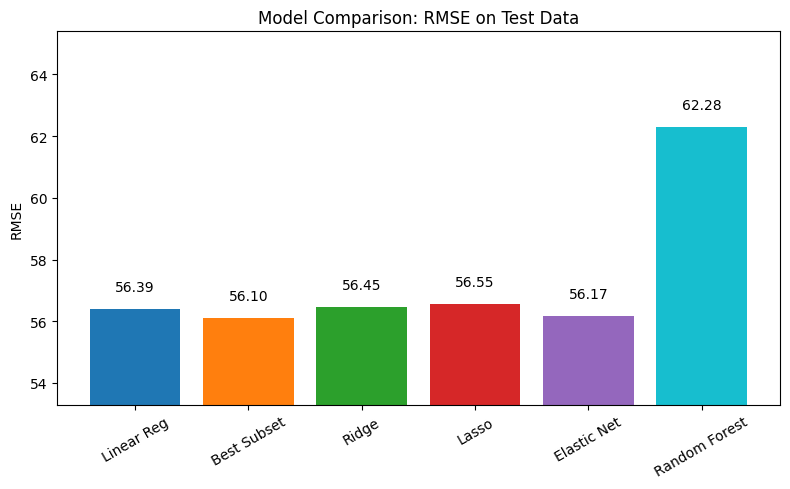

In [ ]:
import matplotlib.pyplot as plt

# Model names and RMSE values
model_names = ['Linear Reg', 'Best Subset', 'Ridge', 'Lasso', 'Elastic Net', 'Random Forest']
rmse_values = [
    metrics_ols["RMSE"],
    metrics_best["RMSE"],
    metrics_ridge["RMSE"],
    metrics_lasso["RMSE"],
    metrics_elastic["RMSE"],
    metrics_rf["RMSE"]
]

# Same bold colors as before
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf']

# Create the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, rmse_values, color=colors)
plt.ylabel("RMSE")
plt.title("Model Comparison: RMSE on Test Data")
plt.xticks(rotation=30)
plt.ylim(min(rmse_values) * 0.95, max(rmse_values) * 1.05)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()



# Visualization - MAE




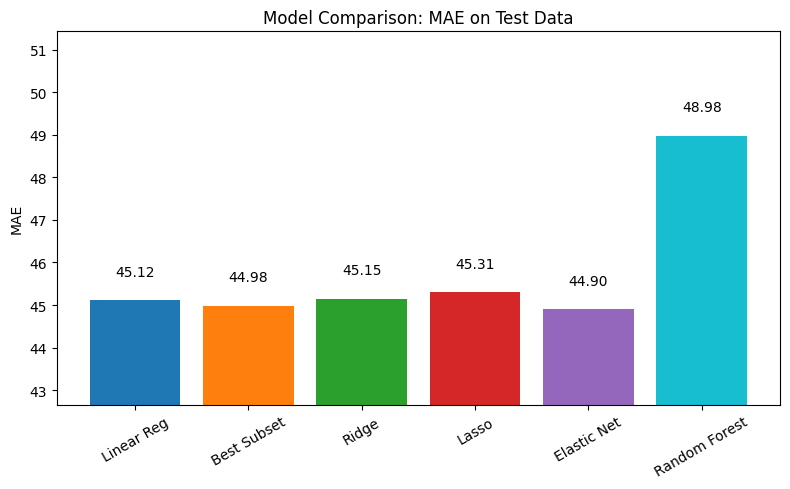

In [ ]:
import matplotlib.pyplot as plt

# Model names and corresponding MAE values
model_names = ['Linear Reg', 'Best Subset', 'Ridge', 'Lasso', 'Elastic Net', 'Random Forest']
mae_values = [
    metrics_ols["MAE"],
    metrics_best["MAE"],
    metrics_ridge["MAE"],
    metrics_lasso["MAE"],
    metrics_elastic["MAE"],
    metrics_rf["MAE"]
]

# Assign bold, unique colors for each model
colors = ['#1f77b4',  # blue
          '#ff7f0e',  # orange
          '#2ca02c',  # green
          '#d62728',  # red
          '#9467bd',  # purple
          '#17becf']  # teal

# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, mae_values, color=colors)
plt.ylabel("MAE")
plt.title("Model Comparison: MAE on Test Data")
plt.xticks(rotation=30)
plt.ylim(min(mae_values) * 0.95, max(mae_values) * 1.05)

# Add value labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


Visualization - RSS

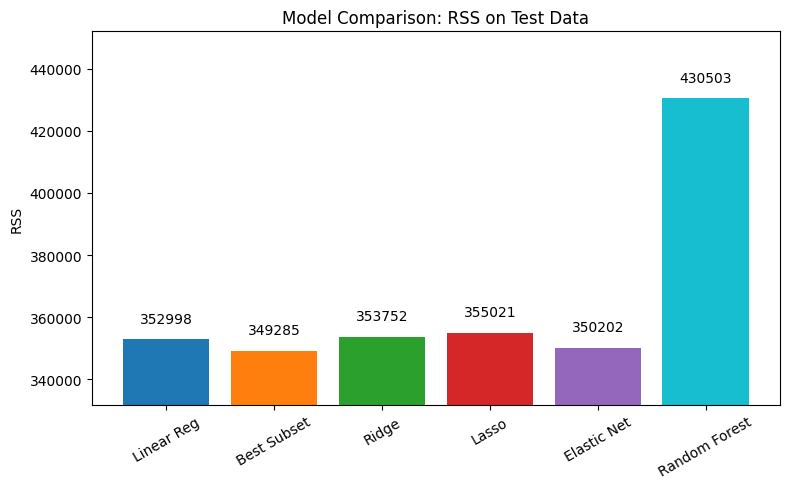

In [ ]:
import matplotlib.pyplot as plt

# Model names and RSS values
model_names = ['Linear Reg', 'Best Subset', 'Ridge', 'Lasso', 'Elastic Net', 'Random Forest']
rss_values = [
    metrics_ols["RSS"],
    metrics_best["RSS"],
    metrics_ridge["RSS"],
    metrics_lasso["RSS"],
    metrics_elastic["RSS"],
    metrics_rf["RSS"]
]

# Same bold colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf']

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, rss_values, color=colors)
plt.ylabel("RSS")
plt.title("Model Comparison: RSS on Test Data")
plt.xticks(rotation=30)
plt.ylim(min(rss_values) * 0.95, max(rss_values) * 1.05)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + (0.01 * max(rss_values)), f"{yval:.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


Visualization - R²

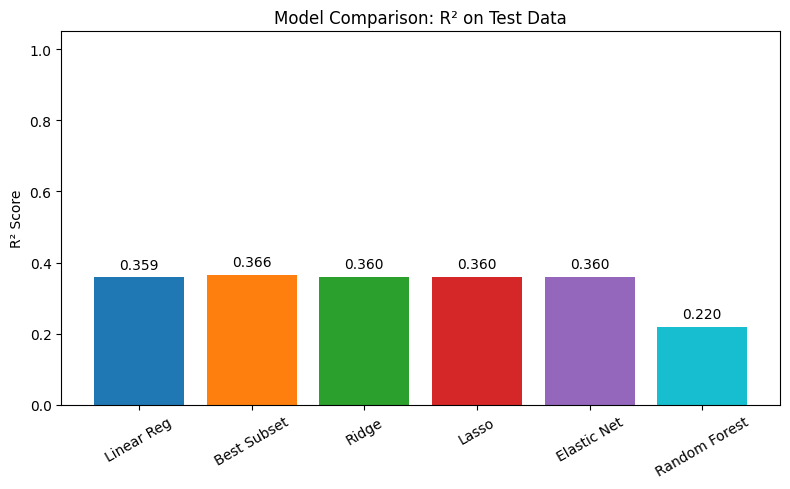

In [ ]:
import matplotlib.pyplot as plt

# Model names and R² values
model_names = ['Linear Reg', 'Best Subset', 'Ridge', 'Lasso', 'Elastic Net', 'Random Forest']
r2_values = [
    metrics_ols["R²"],
    metrics_best["R²"],
    metrics_ridge["R²"],
    metrics_lasso["R²"],
    metrics_elastic["R²"],
    metrics_rf["R²"]
]

# Same bold colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf']

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, r2_values, color=colors)
plt.ylabel("R² Score")
plt.title("Model Comparison: R² on Test Data")
plt.xticks(rotation=30)
plt.ylim(0, 1.05)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.015, f"{yval:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Full metrics dictionary (insert your actual computed values here)
metrics = {
    'OLS': {
        'MAE': metrics_ols["MAE"],
        'RMSE': metrics_ols["RMSE"],
        'MSE': metrics_ols["MSE"],
        'RSS': metrics_ols["RSS"],
        'R²': metrics_ols["R²"]
    },
    'Best Subset': {
        'MAE': metrics_best["MAE"],
        'RMSE': metrics_best["RMSE"],
        'MSE': metrics_best["MSE"],
        'RSS': metrics_best["RSS"],
        'R²': metrics_best["R²"]
    },
    'Ridge': {
        'MAE': metrics_ridge["MAE"],
        'RMSE': metrics_ridge["RMSE"],
        'MSE': metrics_ridge["MSE"],
        'RSS': metrics_ridge["RSS"],
        'R²': metrics_ridge["R²"]
    },
    'Lasso': {
        'MAE': metrics_lasso["MAE"],
        'RMSE': metrics_lasso["RMSE"],
        'MSE': metrics_lasso["MSE"],
        'RSS': metrics_lasso["RSS"],
        'R²': metrics_lasso["R²"]
    },
    'Elastic Net': {
        'MAE': metrics_elastic["MAE"],
        'RMSE': metrics_elastic["RMSE"],
        'MSE': metrics_elastic["MSE"],
        'RSS': metrics_elastic["RSS"],
        'R²': metrics_elastic["R²"]
    },
    'Random Forest': {
        'MAE': metrics_rf["MAE"],
        'RMSE': metrics_rf["RMSE"],
        'MSE': metrics_rf["MSE"],
        'RSS': metrics_rf["RSS"],
        'R²': metrics_rf["R²"]
    }
}

# Create and display DataFrame
metrics_df = pd.DataFrame(metrics).T  # Transpose for better layout
display(metrics_df.round(3))


,MAE,RMSE,MSE,RSS,R²
OLS,45.121,56.393,3180.160,352997.721,0.359
Best Subset,44.983,56.096,3146.715,349285.416,0.366
Ridge,45.150,56.450,3186.950,353751.600,0.360
Lasso,45.310,56.550,3198.390,355021.420,0.360
Elastic Net,44.900,56.170,3154.980,350202.320,0.360
Random Forest,48.980,62.280,3878.410,430503.170,0.220
